In [1]:
import pathlib as pl
import numpy as np
import cv2
import matplotlib.pyplot as plt
import mahotas
%matplotlib inline

In [2]:
# Size for large photo displays; halve for small/side-by-side photos
# Ratio for photos is 5:3
# plt.rcParams['figure.figsize'] = (30, 50)
plt.rcParams['figure.figsize'] = (40, 24)

For the first step of the Build phase, I will examine the photos for quality and consistency to ensure I can perform all image processing required for computer vision and photogrammetry operations. This includes:
* Examining image matrix operations
* Setting up a calibration collection



In [3]:
original_main = [str(photo) for photo in sorted(pl.Path('../data/original_main').glob('*.jpg'))]
original_midspan = [str(photo) for photo in sorted(pl.Path('../data/original_midspan').glob('*.jpg'))]
annotated_main = [str(photo) for photo in sorted(pl.Path('../data/annotated_main').glob('*.jpg'))]
annotated_midspan = [str(photo) for photo in sorted(pl.Path('../data/annotated_midspan').glob('*.jpg'))]

In [4]:
sample_midspan = cv2.imread(original_midspan[2])
sample_midspan_gray = cv2.cvtColor(sample_midspan, cv2.COLOR_BGR2GRAY)
sample_midspan_blurred = cv2.GaussianBlur(sample_midspan_gray, (15, 15), 0)

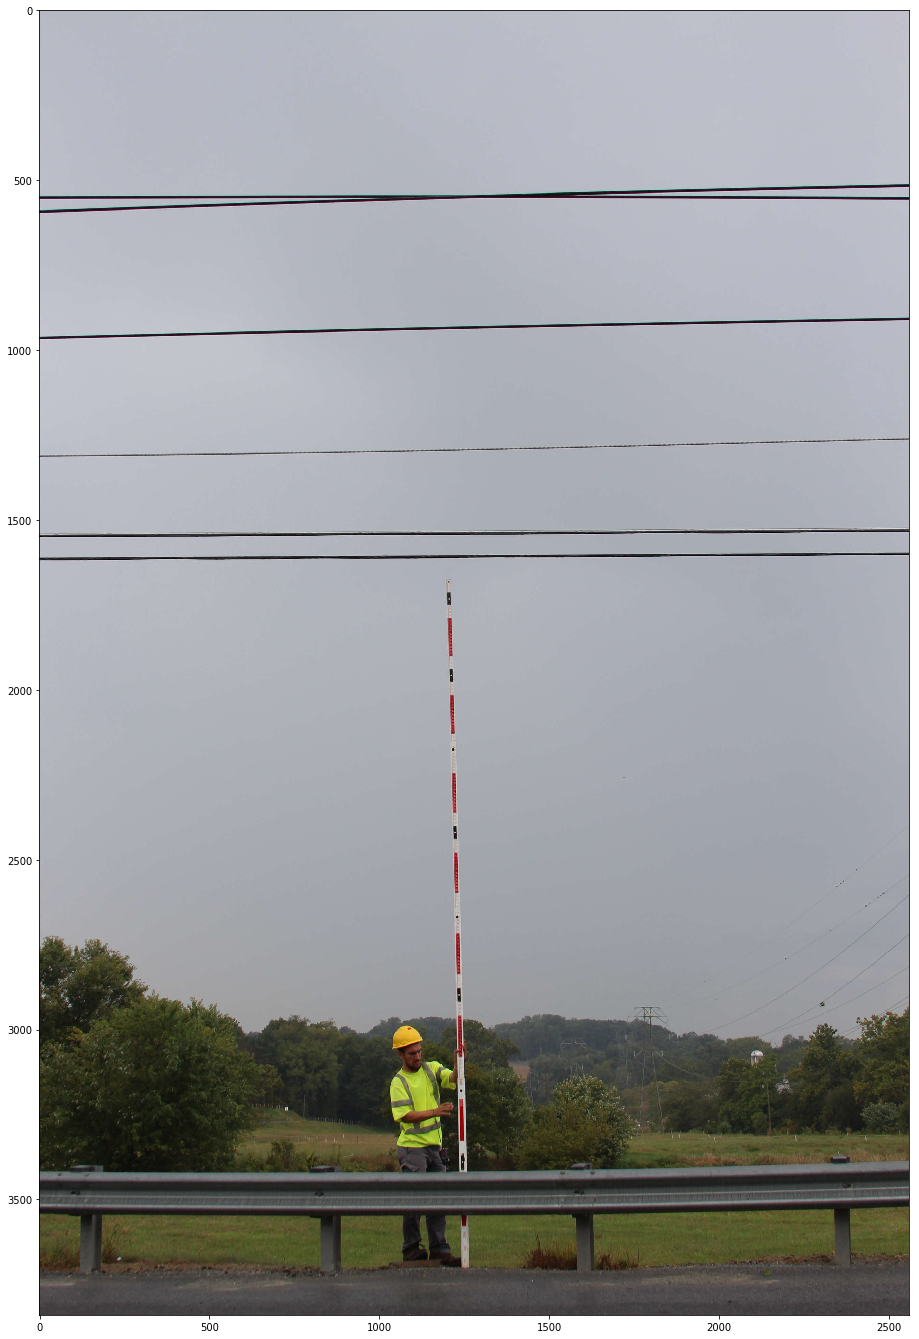

In [5]:
_ = plt.imshow(cv2.cvtColor(sample_midspan, cv2.COLOR_BGR2RGB))

## Edge Detection

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


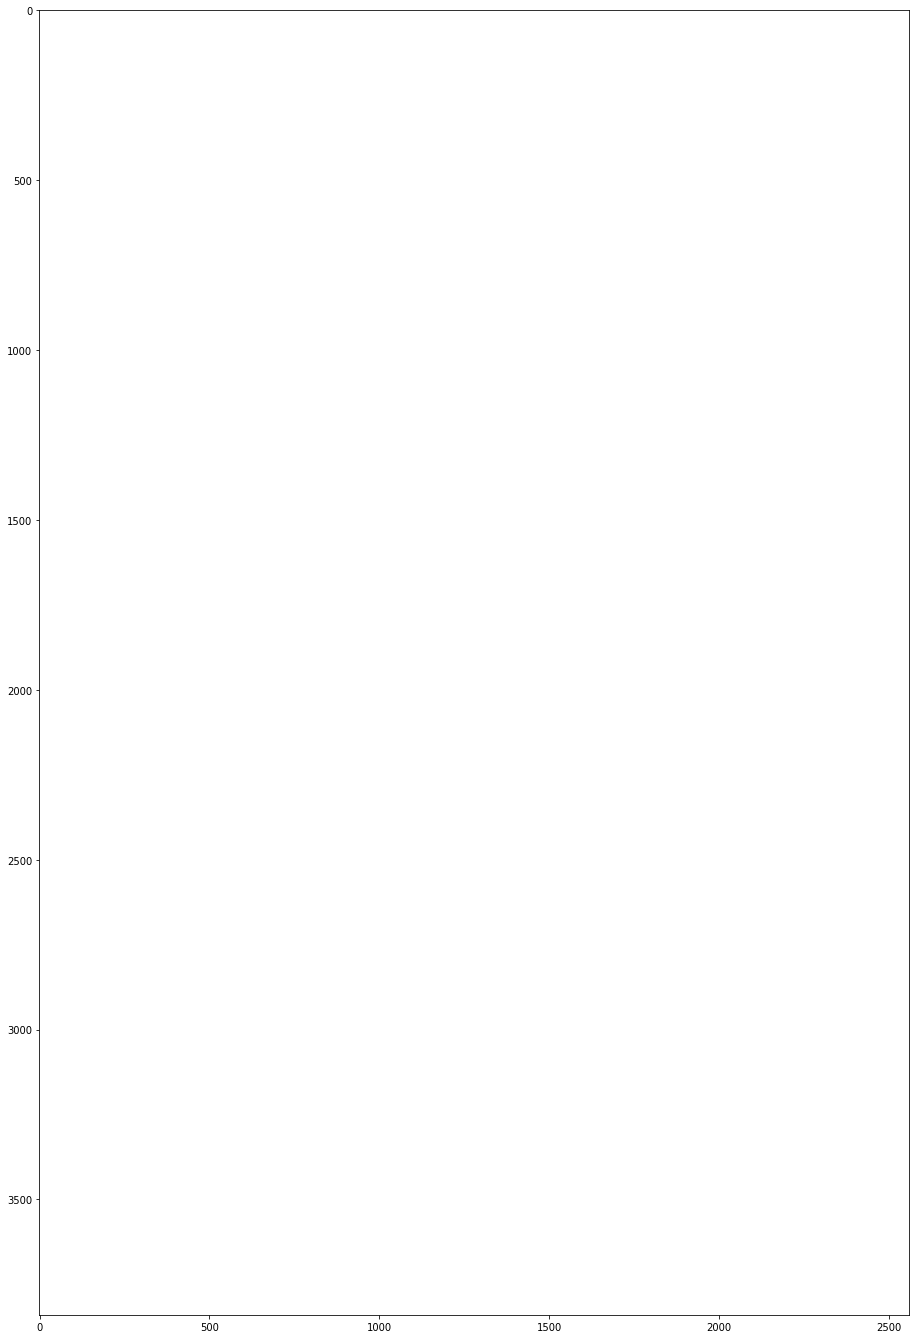

In [9]:
gray = np.float32(sample_midspan_gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
sample_midspan[dst>0.05*dst.max()]=[0,0,255]
_ = plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))